Nama : Ryan Fadhilah Faizal Hakim

NRP : 2C2220007

Subject : Logistic Regression Case

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [215]:
# Load the dataset
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')  # The dataset likely uses ';' as a separator

# Display the first few rows of the data to inspect
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [216]:
# Mengubah variabel target 'y' menjadi numerik (yes = 1, no = 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Mengubah variabel kategori menjadi numerik dengan one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Membagi data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengecek ukuran data training dan test
print(X_train.shape, X_test.shape)

(32950, 53) (8238, 53)


In [217]:
from sklearn.linear_model import LogisticRegression

# Mendefinisikan model Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Soal 1**

a. Apa maksud dari warning di atas?

b. Perbaiki code di atas agar tidak muncul warning di atas.

**Jawaban Soal 1**

a. Warning di atas menunjukkan bahwa setelah di set-up nilai parameter dari `max_iter` yang berfungsi untuk mengoptimisasi model logistic regression telah mencapai batas dari iterasi tetapi model belum mencapai `convergen` (convergen = Perubahan nilai loss function menjadi sangat kecil).

b. Perbaikan dari model nya berikut saya lakukan agar warning-nya tidak muncul yaitu dengan menstandarisasi fitur untuk mempercepat `convergen`.

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Mendefinisikan model Logistic Regression
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg.predict(X_test)


---

In [219]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Laporan Klasifikasi:\n", class_report)


Akurasi: 0.9115076474872542
Confusion Matrix:
 [[7103  200]
 [ 529  406]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



**Soal 2**

Buatkan analisa dari hasil di atas.

**Jawaban Soal 2**

Pertama saya buatkan ke dalam visualisasi heatmap untuk confusion matriks nya agar mudah terbaca dengan code dibawah

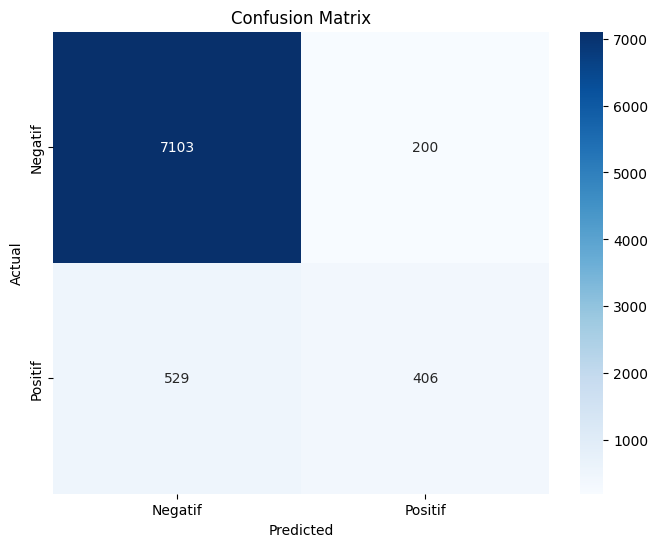

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hasil confusion matrix di atas berbeda dengan hasil confusion matrix yang sebelumnya karena model yang sekarang sudah mencapai `convergen`. berikut saya lampirkan sebelum dan sesudah konvergensi:

**Sebelum `convergen`:**

```
Akurasi: 0.9098082058752124
Confusion Matrix:
 [[7097  206]
 [ 537  398]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238
```

**Sesudah `convergen`:**

```
Akurasi: 0.9115076474872542
Confusion Matrix:
 [[7103  200]
 [ 529  406]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238
```






berdasarkan heatmap confusion matrix di atas yang saya buat:


*   Nilai dari akurasi setelah mencapai `convergen` adalah 91.1% sedangkah sebelum mencapai `convergen` sebesar 90.9% yang artinya bahwa akurasi model dalam memprediksi meningkat sebesar 0.2%.  

*   Berdasarkan heatmap confusion matrix setelah `convergen`, terdapat Jumlah prediksi benar untuk kelas 0 (negatif) atau disebut **True Negatives** sebanyak 7103. Jumlah prediksi salah untuk kelas 0 (prediksi positif, tetapi sebenarnya negatif) atau **False Positives** sebanyak 200. Jumlah prediksi salah untuk kelas 1 (prediksi negatif, tetapi sebenarnya positif) atau **False Negatives** sebanyak 529. dan Jumlah prediksi benar untuk kelas 1 (positif) atau **True Positives** sebanyak 406.

*   Berdasarkan hasil evaluasi untuk model yang sudah `convergen`, Nilai `Precision` untuk **kelas 0** adalah *93%* yang artinya dari semua prediksi positif untuk kelas 0, 93% benar-benar positif. Nilai `Precision` untuk **kelas 1** adalah *67%* yang artinya dari semua prediksi positif untuk kelas 1, hanya 67% yang benar-benar positif. Nilai `Recall` untuk **kelas 0** adalah *97%* yang artinya 97% berhasil diprediksi dengan benar. Nilai `Recall` untuk **kelas 1** adalah *43%* yang artinya 43% berhasil diprediksi dengan benar.

*   F1-Score:
**  F1-Score untuk kelas 0: 0.95 —
    Menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 0.
**  F1-Score untuk kelas 1: 0.53 —
    Menunjukkan kinerja yang kurang baik untuk kelas 1, di mana terdapat trade-off antara precision dan recall.

*   Macro Average:
**  Precision: 0.80
**  Recall: 0.70
**  F1-Score: 0.74
**  Ini menunjukkan bahwa model memiliki
    kinerja yang kurang baik pada kelas minoritas (kelas 1).

*   Weighted Average:
**  Menunjukkan hasil yang lebih baik (0.90 untuk precision dan 0.91 untuk recall) karena memperhitungkan jumlah data di setiap kelas. Ini berarti model lebih baik dalam memprediksi kelas yang lebih besar (kelas 0).


Kesimpulan saya adalah untuk model menunjukkan performa yang sangat baik untuk kelas 0 tetapi memiliki masalah dalam mendeteksi kelas 1 dengan nilai `Recall` sebesar 43%  hal ini terjadi karena jumlah sample dari kelas 1 itu lebih sedikit daripada jumlah sample kelas 0.

bukti nya adalah sebagai berikut:

In [221]:
data['y'].value_counts()

,count
y,
0,36548
1,4640


---

**Soal 3**

buatlah data test dari dataset yang digunakan kemudian ujikan ke model yang telat dibuat.

**Jawaban soal 3**

disini saya mengambil sebanyak 500 data acak dari data test nya

In [222]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

random_indices = np.random.choice(X_test.index, size=500, replace=False)
X_new_test = X_test.loc[random_indices]
y_new_test = y_test.loc[random_indices]

# Memprediksi kelas untuk data test baru
y_new_pred = logreg.predict(X_new_test)

# Menghitung akurasi untuk data test baru
new_accuracy = accuracy_score(y_new_test, y_new_pred)
print("Akurasi pada data test baru:", new_accuracy)

conf_matrix = confusion_matrix(y_new_test, y_new_pred)
class_report = classification_report(y_new_test, y_new_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Akurasi pada data test baru: 0.912
Confusion Matrix:
 [[429  13]
 [ 31  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       442
           1       0.68      0.47      0.55        58

    accuracy                           0.91       500
   macro avg       0.80      0.72      0.75       500
weighted avg       0.90      0.91      0.90       500



dari hasil di atas, bahwa nilai akurasi dari prediksi model terhadap data test baru adalh 89.6%, tetapi jika dilihat pada **Classification Report** bahwa untuk memprediksi kelas 1 itu memiliki nilai `precision` sebesar 68% dan `recall` sebesar 47% yang menunjukkan bahwa model kurang baik dalam memprediksi kelas 1.

*Note: kode di atas akan menghasilkan nilai akurasi yang berbeda-beda karena saya menggunakan sample acak dari data test nya*

**Soal 4**

Lakukan beberapa eksperimen berikut:
1. Feature Scaling
2. Penyeimbangan Data \
    Dalam dataset ini, kelas 0 (tidak berlangganan) jauh lebih banyak daripada kelas 1 (berlangganan). Ketidakseimbangan kelas bisa membuat model lebih cenderung memprediksi kelas mayoritas. Anda bisa mengatasi ini dengan menyesuaikan **class weight**

**Jawaban Soal 4**

1. Feature Scaling

Melihat sampel data yang dimiliki

In [223]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [224]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

selanjutnya saya melakukan proses *labeling* dengan menggunakan `labelEncoder()` pada fitur yang bernilai *boolean* dan menampilkan hasilnya

In [225]:
label_encoder = LabelEncoder()

kolom_boolean = X.select_dtypes(include=['bool']).columns

for kolom in kolom_boolean:
    X[kolom] = label_encoder.fit_transform(X[kolom])


In [226]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


selanjutnya saya melakukan feature scaling pada data dengan menggunakan `RobustScaler()`

In [227]:
from sklearn.preprocessing import RobustScaler

feature_scaling = RobustScaler().fit_transform(X)

scaled_X = pd.DataFrame(feature_scaling, columns=X.columns)

scaled_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.200000,0.373272,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.266667,-0.142857,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.066667,0.211982,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.133333,-0.133641,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.200000,0.585253,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [228]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [229]:
# Mendefinisikan model Logistic Regression
logreg = LogisticRegression(max_iter=5000)

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg.predict(X_test)


In [230]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Laporan Klasifikasi:\n", class_report)


Akurasi: 0.9115076474872542
Confusion Matrix:
 [[7108  195]
 [ 534  401]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



berdasarkan hasil di atas, terlihat jelas untuk akurasi yang dihasilkan dengan menggunakan `RobustScaler()` sama dengan nilai akurasi dengan fitur yang dilakukan scaling menggunakan `StandardScaler()` sebelumnya. Bedanya adalah proses `feature_scaling` nya dimana untuk yang sebelumnya menggunakan fungsi pipeline untuk melakukan scaling, sedangkan yang ini tidak menggunakan fungsi pipeline. Dan juga perbedaan lainnya adalah apabila menggunakan `RobustScaler()`, memerlukan iterasi yang lebih banyak untuk model mencapai `convergen`

---

2. Melakukan penyeimbangan Data

kembali ke datasets awal, disini saya melakukan *undersampling* untuk kelas 0 (No).

In [231]:
!pip install imbalanced-learn

defining ulang untuk feature (X) dan label (y)

In [232]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

Proses Undersampling

In [233]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

y_resampled.value_counts()

,count
y,
0,4640
1,4640


berdasarkan hasil di atas bahwa kelas 0 dan juga kelas 1 sudah seimbang. Langkah selanjutnya saya train dengan model yang sama dengan menggunakan `StandardScaler()` untuk *scaler* nya

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [235]:
# Mendefinisikan model Logistic Regression
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg.predict(X_test)


Akurasi: 0.8739224137931034
Confusion Matrix:
 [[787 127]
 [107 835]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       914
           1       0.87      0.89      0.88       942

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



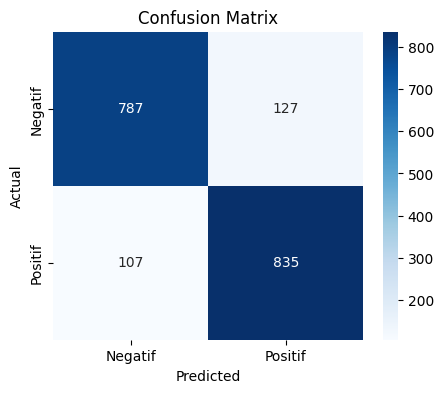

In [236]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Laporan Klasifikasi:\n", class_report)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Apabila diperhatikan pada hasil tersebut, model menghasilkan akurasi 87.4% yang mana lebih kecil daripada model dengan datasets yang belum di seimbangkan, tetapi metriks (parameter) evaluasi lain menunjukkan:

1. Precision:
* Kelas 0: 0.88 — Dari semua prediksi
* kelas 0, 88% benar-benar kelas 0.
* Kelas 1: 0.87 — Dari semua prediksi
* kelas 1, 87% benar-benar kelas 1.

Precision yang tinggi menunjukkan ba hwa model jarang membuat kesalahan dalam klasifikasi kelas positif.

2. Recall:

* Kelas 0: 0.86 — Dari semua data sebenarnya kelas 0, model berhasil mengidentifikasi 86%.
* Kelas 1: 0.89 — Dari semua data sebenarnya kelas 1, model berhasil mengidentifikasi 89%.

Recall yang tinggi menunjukkan bahwa model mampu menangkap sebagian besar data positif yang sebenarnya.

3. F1-Score:

* Kelas 0: 0.87 — Harmonik rata-rata dari precision dan recall untuk kelas 0.
* Kelas 1: 0.88 — Harmonik rata-rata dari precision dan recall untuk kelas 1.

F1-score memberikan gambaran yang lebih baik dari model jika ada ketidakseimbangan antara precision dan recall.

Kesimpulan saya adalah untuk model ini memiliki akurasi akurasi 87.4% serta precision, recall, dan F1-score memiliki nilai yang solid (seimbang) untuk kedua kelas (kelas 0 dan kelas 1).

---